# Airbnb Data Analysis Project 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Checkig The Column Name In The Dataset

In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Checkig For Missing Values 

In [15]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Handling Missing Values 

# Fill missing reviews_per_month with 0 

In [16]:
df['reviews_per_month'] = df['reviews_per_month'].fillna('0')

# Drop rows with missing 'name' or 'host_name' 

In [17]:
df = df.dropna(subset=['name', 'host_name'])

# Fill missing last_review with 'No Review'


In [18]:
df['last_review'] = df['last_review'].fillna("No Review")

In [19]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Handle Outliers

# Remove unrealistic prices (e.g., above $1000)

In [20]:
df = df[df['price'] <= 1000] 

# Cap minimum_nights at 30 (replace higher values with 30)

In [21]:
df['minimum_nights'] = np.where(df['minimum_nights'] > 30, 30, df['minimum_nights'])

In [22]:
df['minimum_nights']

0         1
1         1
2         3
3         1
4        10
         ..
48890     2
48891     4
48892    10
48893     1
48894     7
Name: minimum_nights, Length: 48619, dtype: int64

In [23]:
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,48619.000000,48619.000000
mean,141.290853,5.939859
std,116.757124,8.655256
min,0.000000,1.000000
25%,69.000000,1.000000
50%,105.000000,3.000000
75%,175.000000,5.000000
max,1000.000000,30.000000


# Univariate Analysis

# Distribution of Price 

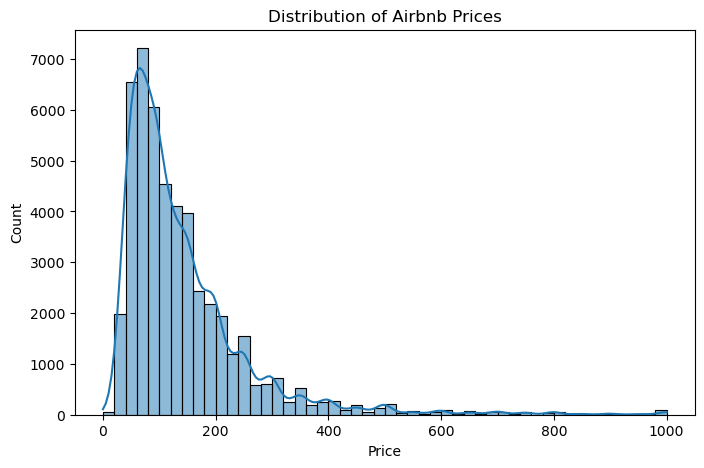

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'],bins =50 , kde = True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


# Most Airbnb listings in NYC are priced below 500 per night, with a heavy concentration under 200. A few extreme outliers (luxury listings) push prices much higher, but they are rare.

# Room Type Count

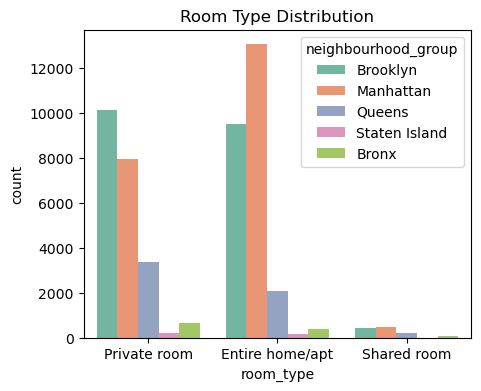

In [42]:
plt.figure(figsize=(5,4))
sns.countplot(data = df, x='room_type' , palette = 'Set2',hue='neighbourhood_group')
plt.title("Room Type Distribution")
plt.show()


# Manhattan shows the highest share of entire home/apartment listings, while Brooklyn has a larger portion of private rooms; shared rooms remain rare across all boroughs.”

 # Listings per Borough


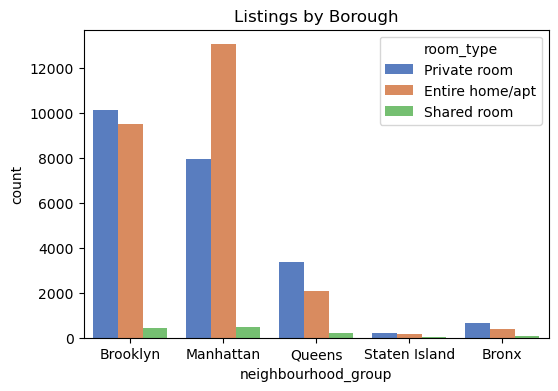

In [28]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='neighbourhood_group', palette="muted" , hue='room_type')
plt.title("Listings by Borough")
plt.show()

# Manhattan has the highest concentration of entire homes/apartments, Brooklyn is strong in private rooms, while Queens, Bronx, and Staten Island have fewer listings spread mostly between private rooms and entire homes.

# Bivariate Analysis




# Average Price by Borough


C:\Users\DELL SSD\AppData\Local\Temp\ipykernel_11708\2304655303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=np.mean, palette="coolwarm")


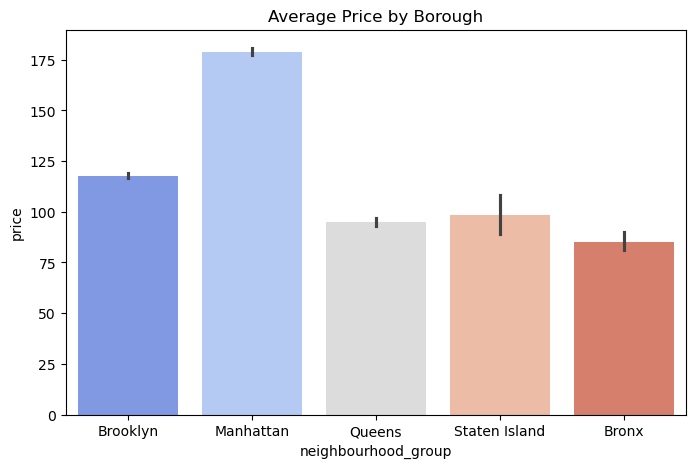

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=np.mean, palette="coolwarm")
plt.title("Average Price by Borough")
plt.show()



# Manhattan has the highest average Airbnb prices, followed by Brooklyn, while Queens, Bronx, and Staten Island are significantly more affordable.

# Average Price by Room Type

C:\Users\DELL SSD\AppData\Local\Temp\ipykernel_11708\1328978709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='room_type', y='price', estimator=np.mean, palette="Set1")


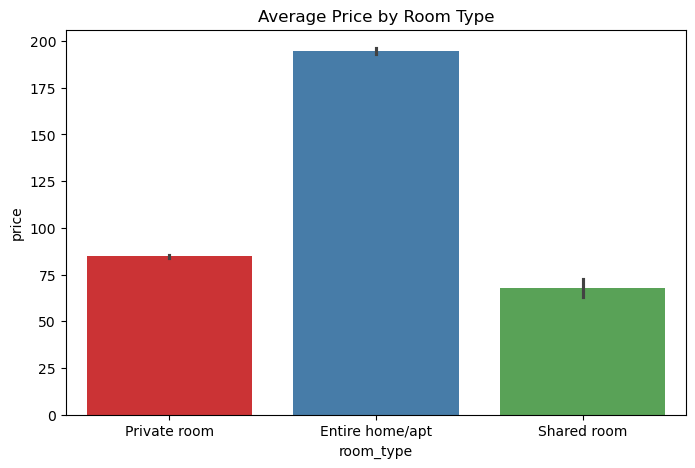

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='room_type', y='price', estimator=np.mean, palette="Set1")
plt.title("Average Price by Room Type")
plt.show()



# Entire homes/apartments are the most expensive on average, private rooms are moderately priced, and shared rooms are the cheapest option

# Scatter: Reviews vs Price

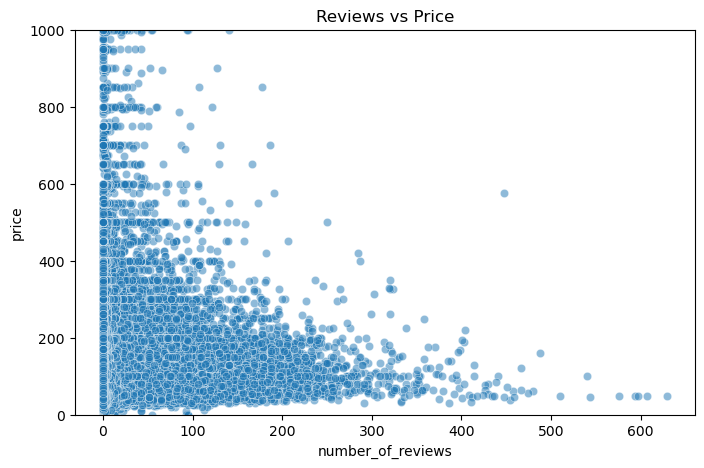

In [32]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5)
plt.ylim(0, 1000)   # limit to avoid outlier effect
plt.title("Reviews vs Price")
plt.show()

# The scatter shows that listings with more reviews are generally in the lower price range, while high-priced listings tend to attract very few reviews